In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')
sys.path.append('../../..')
import mplstereonet
import gempy as gp
#from importlib import reload
import os
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\remote-geomod')  # append local path to access rgeomod module
import pandas as pn

#import rgeomod

#import gdal
import skimage
import scipy
import linecache
from mpl_toolkits.mplot3d import Axes3D
from copy import copy

import seaborn as sns

../../../gempy/data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_pvhu_7ww.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 (0000:01:00.0)
../../../gempy/posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
../../../gempy/posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulatio

- Model 1: fault orientation uncertain 
- Model 2: fault location of fault_NWSE equally likely within 200m 
- Model 3a-d: formation orientation
- Model 4a-d: formation and fault orientation
- Model 5a-d: formation and fault orientation, fault location

| Model num | fault pos | fault orient | form orient | path_i | path_o | remark |
|-----------|-----------|--------------|-------------|--------|--------| |
| 1 |-|y|-| all_points  | Foliations_clust20_nl  |faultsonly|
|-----------|-----------|--------------|-------------|--------|--------||
| 2 |y|-|-|  ? |  all_foliations ||
|-----------|-----------|--------------|-------------|--------|--------||
| 3a|-|-|y|all_points|Foliations_clust20_nf|save|
| 3b|-|-|y|all_points|Foliations_clust21_nf|save|
| 3c|-|-|y|all_points|Foliations_clust22_nf|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 4a|-|y|y|all_points|Foliations_clust20|save|
| 4b|-|y|y|all_points|Foliations_clust21|save|
| 4c|-|y|y|all_points|Foliations_clust22|save|
|-----------|-----------|--------------|-------------|--------|--------||
| 5a|y|y|y|?|Foliations_clust20|
| 5b|y|y|y|?|Foliations_clust21|
| 5c|y|y|y|?|Foliations_clust22|

In [78]:
model_num, param = 3,'b'

In [79]:
if model_num == 1:
    path_interf = 'all_points.csv'
    path_orient = 'Foliations_clust20_nl.csv'
    print('faults only')
    
elif model_num == 2:
    path_interf = None
    path_orient = 'all_foliations.csv'
    
elif model_num == 3:
    path_interf = 'all_points.csv'
    if param == 'a':
        path_orient = 'Foliations_clust20_nf.csv'
    elif param == 'b':
        path_orient = 'Foliations_clust21_nf.csv'
    elif param == 'c':
        path_orient = 'Foliations_clust22_nf.csv'
        
elif (model_num == 4) or (model_num == 5):
    if param == 'a':
        path_orient = 'Foliations_clust20.csv'
    elif param == 'b':
        path_orient = 'Foliations_clust21.csv'
    elif param == 'c':
        path_orient = 'Foliations_clust22.csv'
    
    if model_num == 4:
        path_interf = 'all_points.csv'
    if model_num == 5:
        path_interf = None

In [80]:
path_interf,path_orient

('all_points.csv', 'Foliations_clust21_nf.csv')

In [81]:
path_interf='data/'+path_interf
path_orient='data/'+path_orient

In [82]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])

In [83]:
geo_data = gp.create_data(extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

In [84]:
#sorting of lithologies
gp.set_series(geo_data,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'fault_NESW1':('fault_NESW1'),
                        'fault_NESW2':('fault_NESW2'),
                        'fault_NESW3':('fault_NESW3'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},
             order_formations=['fault_NWSE','fault_NS',
                                'fault_NESW1','fault_NESW3','fault_NESW2',
                               'Liassic','Triassic','Carboniferous','basement'])

In [85]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393','fault_NESW4':'#939393' }
geo_data.set_colors(colordict)

,value,formation_number,color
fault_NWSE,1,1,#2a2a2a
fault_NS,2,2,#2a2a2a
fault_NESW1,3,3,#939393
fault_NESW3,4,4,#939393
fault_NESW2,5,5,#939393
Liassic,6,6,#015482
Triassic,7,7,#9f0052
Carboniferous,8,8,#ffbe00
basement,9,9,#728f02


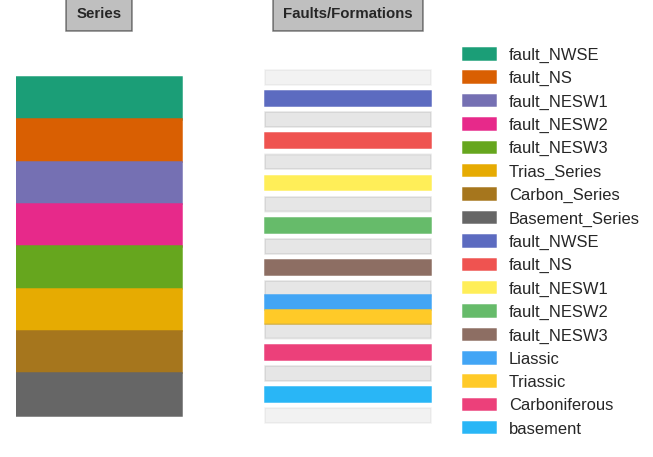

In [86]:
gp.get_sequential_pile(geo_data)

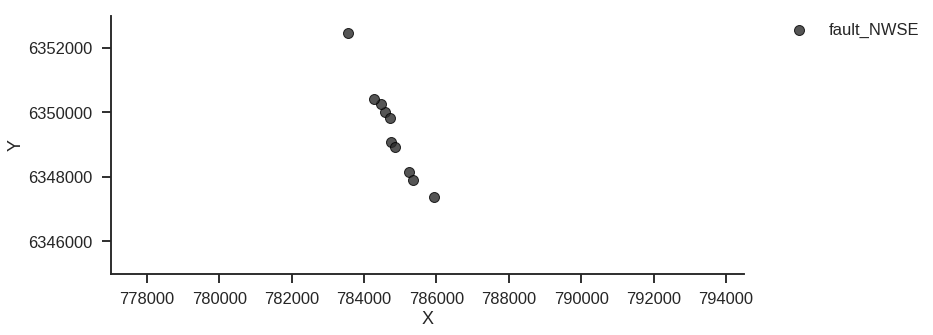

In [87]:
gp.plotting.plot_data(geo_data,direction='z',data_type='interfaces',series='fault_NWSE')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\clusteredorient_only.png", format='png', dpi=1000)

In [88]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float32',theano_optimizer='fast_run')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cuda
Precision:  float32
Number of faults:  5


### Choosing which series a fault offsets

In [89]:
faults1=['fault_NESW1',
 'fault_NESW2',
 'fault_NESW3']
faults2=['fault_NS',
 'fault_NWSE']

In [90]:
geo_data.faults_relations.loc[faults1,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Carbon_Series']] = True
geo_data.faults_relations

,fault_NWSE,fault_NS,fault_NESW1,fault_NESW2,fault_NESW3,Trias_Series,Carbon_Series,Basement_Series
fault_NWSE,False,False,False,False,False,True,True,False
fault_NS,False,False,False,False,False,True,True,False
fault_NESW1,False,False,False,False,False,True,False,False
fault_NESW2,False,False,False,False,False,True,False,False
fault_NESW3,False,False,False,False,False,True,False,False
Trias_Series,False,False,False,False,False,False,False,False
Carbon_Series,False,False,False,False,False,False,False,False
Basement_Series,False,False,False,False,False,False,False,False


In [91]:
interp_data.update_interpolator(geo_data)

CPU 1 core = 2,63

GPU = ,12

In [92]:
lith_block, fault_block = gp.compute_model(interp_data)

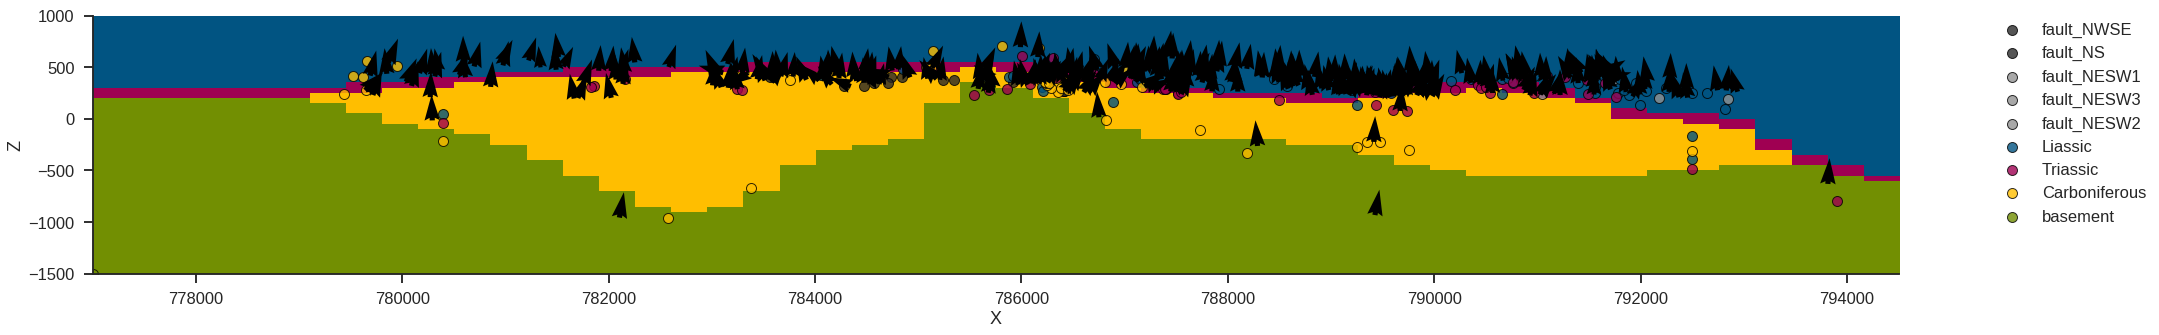

In [93]:
gp.plot_section(geo_data, lith_block[0], 18, plot_data=True)
#plt.savefig('data/section_y18_model'+str(model_num)+param)

## Adding topography

In [94]:
topo_plotting = np.load('topo_plotting.npy')

In [95]:
from gempy.utils import topography
elevation = topography.DEM(xyzarray=topo_plotting, geodata=geo_data)#,output_path = folder,interpdata=interp_data)

Define path to raster file


(50, 50)


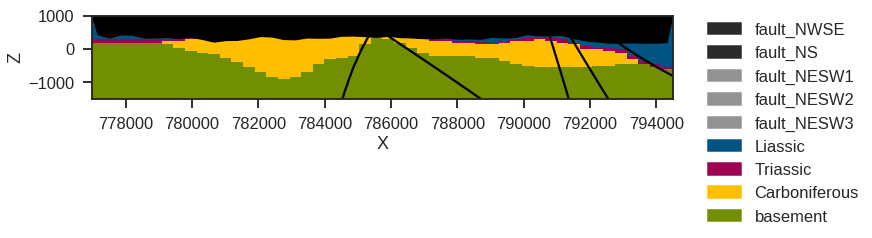

In [96]:
n, direc = 18, 'y'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

(50, 50)


/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


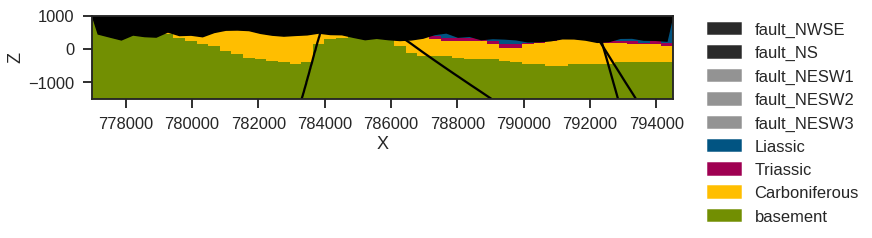

In [97]:
n, direc = 40, 'y'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

(50, 50)


/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


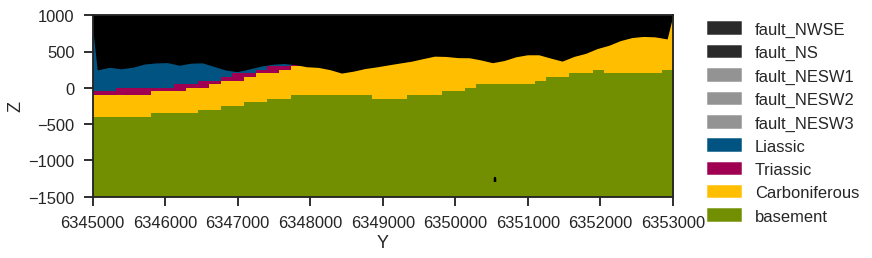

In [98]:
n, direc = 9, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

(50, 50)


/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


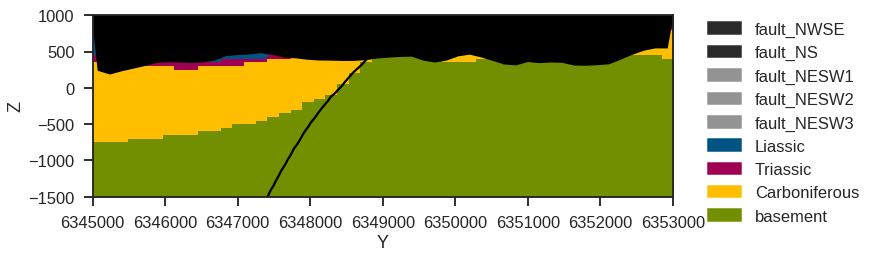

In [99]:
n, direc = 22, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

(50, 50)


/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


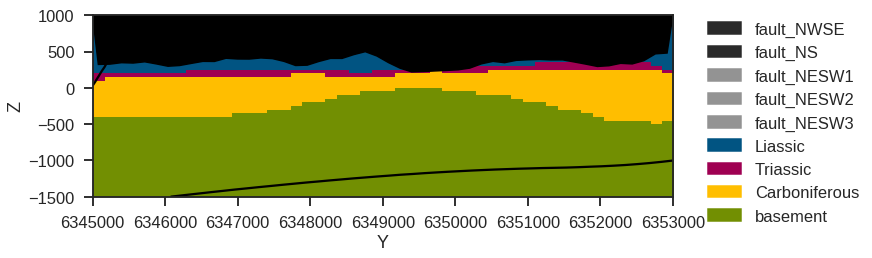

In [100]:
n, direc = 32, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

(50, 50)


/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/elisa/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


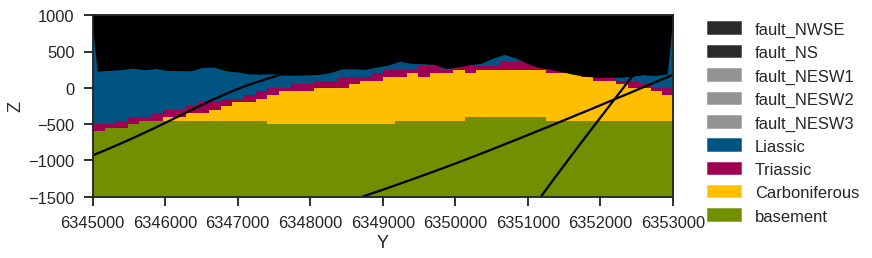

In [101]:
n, direc = 44, 'x'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=False, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)
plt.savefig('/home/elisa/elisa/section_'+str(n)+direc+'_model'+str(model_num)+param)

#### GeologicalMap

In [102]:
# We stack the topograghy and the regular grid values
topo_data = np.load('surface_coordinates.npy')
x_to_int = np.vstack((topo_data, geo_data.grid.values))

In [103]:
lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
lith_map = lith_complete[0][:320*700]
lith_mesh = lith_complete[0][320*700:]

##### Plot section of the mesh

(50, 50)


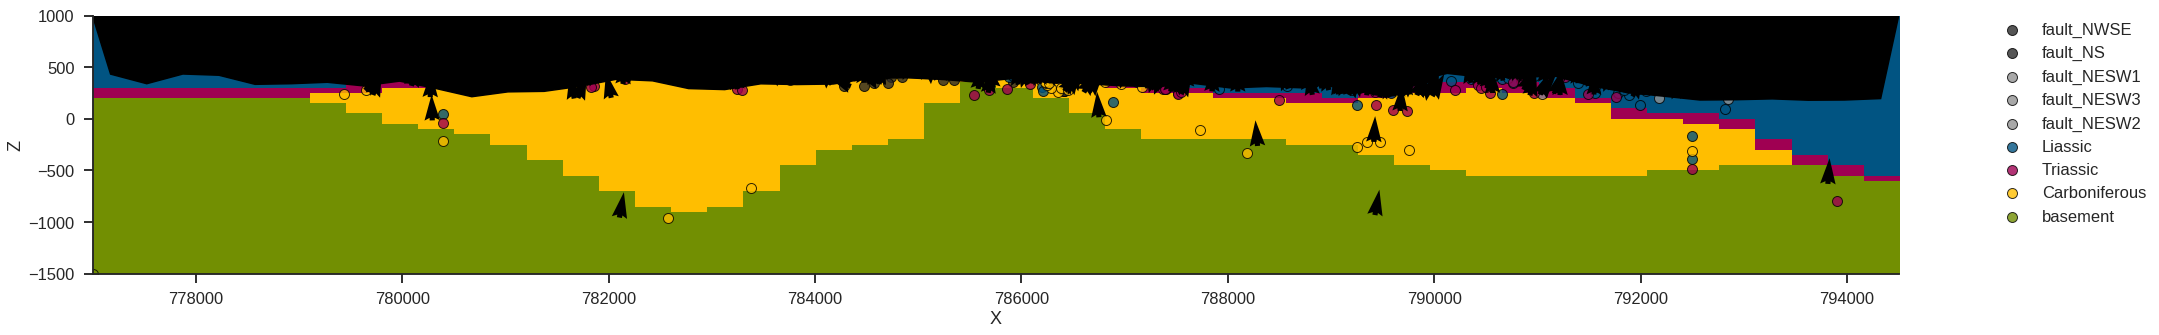

In [104]:
gp.plot_section(geo_data, lith_mesh, 18, plot_data=True, topography=elevation)

##### Plot geological map

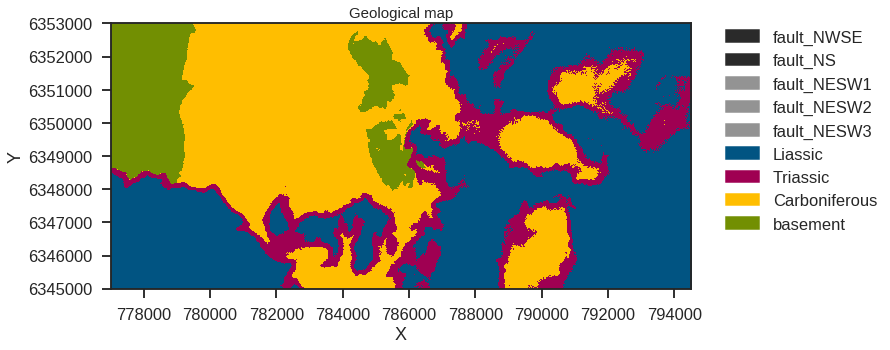

In [105]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map.reshape(320,700),axis=0))
plt.savefig('/home/elisa/elisa/map_'+str(model_num)+param)

In [106]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,...,formation_number,order_series,isFault,Unnamed: 0,beta,index,kappa,n_points,annotations,formation_value
0,783639.818000,6.352490e+06,408.343143,-9.254166e-01,-3.368241e-01,0.173648,80.000000,250.00,1,fault_NWSE,...,1,1,True,713,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,784714.333000,6.349362e+06,404.256019,-9.361168e-01,-8.189961e-02,0.342020,70.000000,265.00,1,fault_NWSE,...,1,1,True,715,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},1}$",1
2,784347.374000,6.350359e+06,316.354856,-8.443743e-01,-4.123763e-01,0.342020,70.000000,243.97,1,fault_NWSE,...,1,1,True,714,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},2}$",1
3,784621.048000,6.350057e+06,357.440542,-9.106174e-01,-2.319442e-01,0.342020,70.000000,255.71,1,fault_NWSE,...,1,1,True,716,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},3}$",1
4,786416.757671,6.351491e+06,270.371423,5.265408e-01,3.686878e-01,0.766044,40.000000,55.00,1,fault_NS,...,2,2,True,712,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{2}},0}$",2
5,791031.228000,6.345650e+06,241.782365,6.000939e-01,-2.303545e-01,0.766044,40.000000,111.00,1,fault_NESW1,...,3,3,True,709,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{3}},0}$",3
6,791639.175000,6.349891e+06,443.273715,8.528685e-01,-1.503837e-01,0.500000,60.000000,100.00,1,fault_NESW2,...,5,4,True,710,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{5}},0}$",5
7,791682.282000,6.350183e+06,387.023171,9.076734e-01,-3.303661e-01,0.258819,75.000000,110.00,1,fault_NESW3,...,4,5,True,711,NaN,NaN,10000.000000,NaN,"${\bf{x}}_{\beta \,{\bf{4}},0}$",4
8,789693.142500,6.347540e+06,362.581782,-1.990567e-01,1.103389e-01,0.973757,13.155359,299.00,1,Liassic,...,6,6,False,217,0.0,263.0,666.000000,2.0,"${\bf{x}}_{\beta \,{\bf{6}},0}$",6
9,792371.839000,6.347436e+06,210.747937,-2.810457e-01,-8.058856e-02,0.956305,17.000000,254.00,1,Liassic,...,6,6,False,182,0.0,206.0,9999.000000,1.0,"${\bf{x}}_{\beta \,{\bf{6}},1}$",6


In [109]:
# only for faults
vMF_list_faults = []
for e, i in geo_data.orientations[geo_data.orientations['isFault']==True][['G_x', 'G_y', 'G_z', 'kappa']].iterrows():
   # print(i[['G_x', 'G_y', 'G_z']].values)
    #print(i)
    vMF_list_faults.append(fish.vMF('vMF_' + str(e), mean=i[['G_x', 'G_y', 'G_z']].values, kappa=i['kappa']))

In [113]:
vMF_list_faults

I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.
I, Elisa Heim, promise to fix this method.


[Von Mises Fisher distribution
 Formation:'vMF_0'
 Mean orientation = (250, 79)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_1'
 Mean orientation = (265, 69)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_2'
 Mean orientation = (244, 69)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_3'
 Mean orientation = (256, 69)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_4'
 Mean orientation = (55, 39)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_5'
 Mean orientation = (111, 39)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_6'
 Mean orientation = (100, 59)
 Kappa = 10000, Von Mises Fisher distribution
 Formation:'vMF_7'
 Mean orientation = (110, 74)
 Kappa = 10000]

### Creating vMF distributions for each orientation

In [120]:
def create_vMF_list(orientdf, faultsonly=False, lithonly=False):
    if faultsonly:
        df = orientdf[orientdf['isFault']==True]
    elif lithonly:
        df = orientdf[orientdf['isFault']==False]
    else:
        df = orientdf
    for e, i in df[['G_x', 'G_y', 'G_z', 'kappa']].iterrows():
        vMF_list.append(fish.vMF('vMF_' + str(e), mean=i[['G_x', 'G_y', 'G_z']].values, kappa=i['kappa']))
    return vMF_list

In [121]:
vmflist = create_vMF_list(geo_data.orientations)

In [122]:
len(vmflist)

987

In [119]:
len(geo_data.orientations)

329

In [108]:
import gempy.utils.fishdist as fish
vMF_list = []
for e, i in geo_data.orientations[['G_x', 'G_y', 'G_z', 'kappa']].iterrows():
   # print(i[['G_x', 'G_y', 'G_z']].values)
    #print(i)
    vMF_list.append(fish.vMF('vMF_' + str(e), mean=i[['G_x', 'G_y', 'G_z']].values, kappa=i['kappa']))
    

for some purposes spherecluster package would be good (or I copy the respective file?!


In [42]:
new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list)))

In [43]:
# Now we can sample by calling the following
new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list) ))
# Modifing the rescale dataframe
interp_data.geo_data_res.orientations[['G_x', 'G_y', 'G_z']] = new_orientations
interp_data.geo_data_res.calculate_orientations()
#interp_data.geo_data_res.orientations
# Preparing the rescale data for theano because of the stupid basement
# shame on me that this is the librarz

In [44]:
#interp_data.update_interpolator(geo_data)
lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
lith_map = lith_complete[0][:320*700]
lith_mesh = lith_complete[0][320*700:]

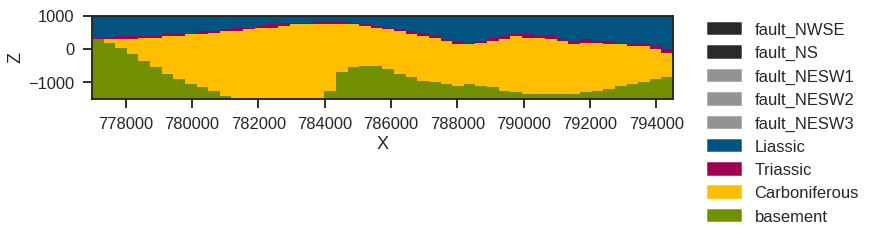

In [45]:
gp.plot_section(geo_data,lith_mesh,cell_number=25)

### Probability field function and loop

#### first iteration initializes lithology probability arrays

In [46]:
### get number of different lithologies
lith_id = np.unique(np.round(lith_mesh).astype(int))

### round blocks
block_map  = np.round(lith_map).astype(int)
block_mesh  = np.round(lith_mesh).astype(int)

### create one array for every lithology to count frequency
count_map = np.zeros((len(lith_id), block_map.shape[0]))
count_mesh = np.zeros((len(lith_id), block_mesh.shape[0]))

In [48]:
np.unique(count_map)

array([0.])

In [49]:
n_iter = 10000

In [52]:
model_num

3

In [50]:
for a in range(0,n_iter):
    # Now we can sample by calling the following
    new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list)))
    # Modifing the rescale dataframe
    interp_data.geo_data_res.orientations[['G_x', 'G_y', 'G_z']] = new_orientations
    interp_data.geo_data_res.calculate_orientations()
    
    #interp_data.update_interpolator(geo_data)

    lith_complete, _ = gp.compute_model_at(x_to_int, interp_data)
    lith_map = lith_complete[0][:320*700]
    lith_mesh = lith_complete[0][320*700:]

    # update probability fields
    block_map  = np.round(lith_map).astype(int)
    block_mesh  = np.round(lith_mesh).astype(int)
    #print(block_mesh.shape)
    for i, l_id in enumerate(lith_id): #enumerate through all liths
        count_map[i][block_map == l_id] += 1 #sum up frequency
        count_mesh[i][block_mesh == l_id] += 1 

prob_map = count_map/n_iter
prob_mesh = count_mesh/n_iter


KeyboardInterrupt: 

In [ ]:
def calculate_ie_masked(prob):
    ie = np.zeros_like(prob[0])
    for l in prob:
        pm = np.ma.masked_equal(l, 0)  # mask where prob is 0
        ie -= (pm * np.ma.log2(pm)).filled(0)
    return ie

In [ ]:
def calculate_ie_total(ie, absolute=False):
    if absolute:
        return np.sum(ie)
    else:
        return np.sum(ie) / np.size(ie)

In [ ]:
ie_map=calculate_ie_masked(prob_map)

In [ ]:
ie_mesh=calculate_ie_masked(prob_mesh)

In [ ]:
ie_map_tot = calculate_ie_total(ie_map)
ie_model_tot = calculate_ie_total(ie_mesh)

In [ ]:
ie_map_tot,ie_model_tot

In [ ]:
plt.imshow(ie_mesh.reshape(geo_data.resolution)[:,18,:].T, origin='lower',extent=geo_data.extent[[0,1,4,5]],cmap='viridis')

In [ ]:
plt.contour(ie_mesh.reshape(geo_data.resolution)[:,18,:].T, origin='lower',extent=geo_data.extent[[0,1,4,5]],cmap='viridis')

In [ ]:
plt.contour(ie_mesh.reshape(geo_data.resolution)[:,18,:].T, origin='lower',extent=geo_data.extent[[0,1,4,5]],cmap='viridis')

In [ ]:
plt.imshow(ie_map.reshape(320,700),cmap='viridis')

### Save resulting probability/entropy fields

In [ ]:
spath_map_prob_field = '/home/elisa/elisa/map_prob_model'+str(model_num)+param+'_n'+str(n_iter)
spath_model_prob_field = '/home/elisa/elisa/model_prob_model'+str(model_num)+param+'_n'+str(n_iter)
spath_map_ie = '/home/elisa/elisa/map_ie_model'+str(model_num)+param+'_n'+str(n_iter)
spath_model_ie = '/home/elisa/elisa/model_ie_model'+str(model_num)+param+'_n'+str(n_iter)

In [ ]:
spath_map_prob_field

In [ ]:
np.save(spath_map_prob_field,prob_map)
np.save(spath_model_prob_field,prob_mesh)
np.save(spath_map_ie,ie_map)
np.save(spath_model_ie,ie_mesh)

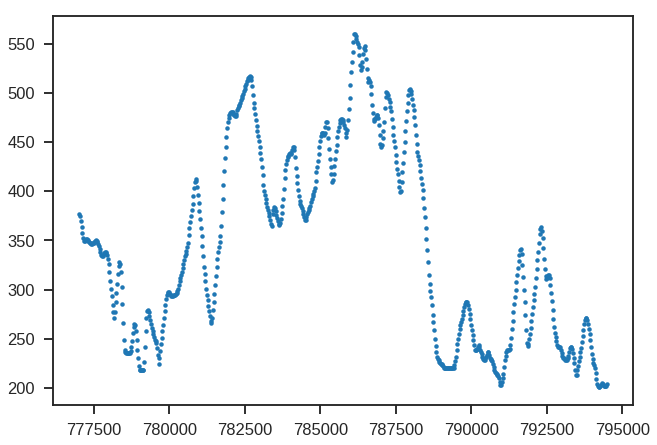

In [30]:
plt.plot(topography[:, 0].reshape(320,700)[160, :],
    topography[:, 2].reshape(320,700)[160, :], '.')

In [31]:
lith_map, _ = gp.compute_model_at(topography, interp_data)

In [32]:
topography

array([[7.7701250e+05, 6.3529875e+06, 3.4900000e+02],
       [7.7703750e+05, 6.3529875e+06, 3.4300000e+02],
       [7.7706250e+05, 6.3529875e+06, 3.4200000e+02],
       ...,
       [7.9443750e+05, 6.3450125e+06, 1.8900000e+02],
       [7.9446250e+05, 6.3450125e+06, 1.8900000e+02],
       [7.9448750e+05, 6.3450125e+06, 1.8900000e+02]])

In [33]:
geo_data.grid.values

array([[ 7.77175e+05,  6.34508e+06, -1.47500e+03],
       [ 7.77175e+05,  6.34508e+06, -1.42500e+03],
       [ 7.77175e+05,  6.34508e+06, -1.37500e+03],
       ...,
       [ 7.94325e+05,  6.35292e+06,  8.75000e+02],
       [ 7.94325e+05,  6.35292e+06,  9.25000e+02],
       [ 7.94325e+05,  6.35292e+06,  9.75000e+02]], dtype=float32)

In [34]:
res_top = interp_data.interpolator.tg.grid_val_T.get_value()

In [35]:
res_reg = interp_data.interpolator.tg.grid_val_T.get_value()

In [36]:
res_reg[:-310][:,0].max()

0.7583649575380434

In [37]:

plt.imshow(res_reg[:-310, 2].reshape(50,50,50)[:,25,:].T,
           extent=(res_reg[:-310][:,0].min(),
                   res_reg[:-310][:,0].max(),
                   res_reg[:-310][:,2].min(),
                   res_reg[:-310][:,2].max()))
plt.plot(res_top[:-310, 0].reshape(320,700)[160, :],
    res_top[:-310, 2].reshape(320,700)[160, :], '.')

ValueError: cannot reshape array of size 224000 into shape (50,50,50)

In [ ]:
lith_map[1]

In [ ]:
interp_data.potential_at_interfaces

In [ ]:
geo_data.formations

In [ ]:
topography = np.load('surface_coordinates.npy')
topography[:, 2] -= 0 

In [42]:
a = np.vstack((topography, geo_data.grid.values))

In [43]:
interp_data.update_interpolator()
lith_map, _ = gp.compute_model_at(a, interp_data)

In [ ]:
lith_block[1].min(), lith_block[1].max()

In [ ]:
plt.hist(lith_block[1][lith_block[1]<-15])

In [ ]:
boundary_pad = (max_pot - min_pot)*0.1

In [ ]:
interp_data.potential_at_interfaces

In [ ]:
plt.hist(lith_map[0])

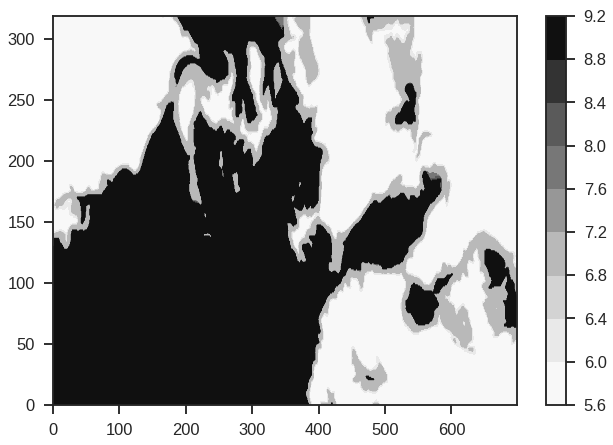

In [38]:
plt.contourf(lith_map[0].reshape(320, 700))
plt.colorbar()

In [44]:
320 * 700

224000

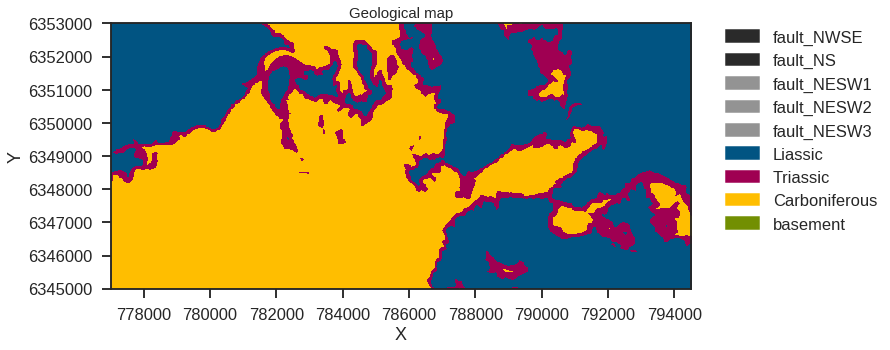

In [45]:
gp.plotting.plot_map(geo_data, geomap=lith_map[0][:224000].reshape(320,700))


### Topography

In [13]:
#topography
path_dtm='C:\\Users\\elisa\\Documents\\Ales\\DISTRIB_2018\\MNT\\MNT_Dx25m_ALES_L93.asc'
folder= "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\unwichtig"
xyz_path = "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\XYZ.csv"

In [ ]:
elevation = topography.DEM(path_dtm, geo_data,output_path = folder,interpdata=interp_data)

In [ ]:
xmap = elevation.xyz_box_resized[:,:,0].ravel()
ymap = elevation.xyz_box_resized[:,:,1].ravel()
zmap = elevation.xyz_box_resized[:,:,2].ravel()
elevation_resized = np.stack((xmap,ymap,zmap),axis=1)

In [ ]:
lith_map, fault_map = gp.compute_model_at(elevation_resized, interp_data)

In [ ]:
gp.plotting.plot_map(geo_data, geomap=lith_map[0].reshape(50,50))
#gp.plotting.extract_countours(geo_data,interp_data, fb=fault_map, cell_number=0)

In [13]:
lith_map, fault_map = gp.compute_model_at(elevation.surface_coordinates[0], interp_data)

In [14]:
import matplotlib

In [17]:
def extract_countours(interp_data, fb,lb=None):   
    lith_colors = ['#000000','#000000','#000000','#000000','#000000']
    cm = matplotlib.colors.LinearSegmentedColormap.from_list('lith_colors', lith_colors, N=5)
    
    n_faults = int(fb.shape[0]/2)
    level = []
    block_id=[]
    
    all_levels = interp_data.potential_at_interfaces[np.where(interp_data.potential_at_interfaces != 0)]
    
    for i in range(fb.shape[0]):
        if i%2:
            block_id.append(i)
    
    for i in range(len(block_id)):
        cp = plt.contour(np.flip(fb[block_id[i]].reshape(320, 700),axis=0),0,
            extent=geo_data.extent[[0,1,2,3]],levels=all_levels[i], cmap=cm)
    if lb is not None:
        cp2 = plt.contour(np.flip(lb[block_id[i]].reshape(320, 700),axis=0),0,
                extent=geo_data.extent[[0,1,2,3]],levels=np.sort(all_levels[len(block_id):]),cmap=cm)

#print(all_levels) 
    

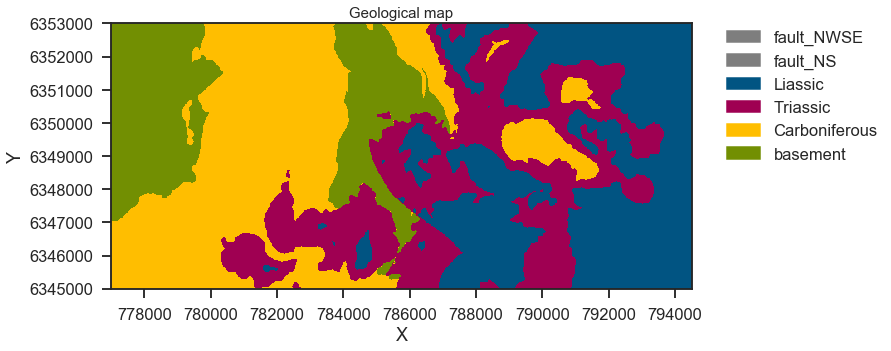

In [97]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map[0].reshape(320, 700),axis=0))
#extract_countours(interp_data,fault_map)
plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\map_filtered_b2.png", format='png', dpi=1000)

In [43]:
#lith_block, fault_block = gp.compute_model(interp_data)

In [13]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,...,formation_number,order_series,isFault,Unnamed: 0,beta,index,kappa,n_points,annotations,formation_value
0,784621.048000,6.350057e+06,357.440542,-9.106174e-01,-2.319442e-01,0.342020,70.000000,255.71,1,fault_NWSE,...,1,1,True,716,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,783639.818000,6.352490e+06,408.343143,-9.254166e-01,-3.368241e-01,0.173648,80.000000,250.00,1,fault_NWSE,...,1,1,True,713,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},1}$",1
2,784714.333000,6.349362e+06,404.256019,-9.361168e-01,-8.189961e-02,0.342020,70.000000,265.00,1,fault_NWSE,...,1,1,True,715,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},2}$",1
3,784347.374000,6.350359e+06,316.354856,-8.443743e-01,-4.123763e-01,0.342020,70.000000,243.97,1,fault_NWSE,...,1,1,True,714,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},3}$",1
4,786416.757671,6.351491e+06,270.371423,5.265408e-01,3.686878e-01,0.766044,40.000000,55.00,1,fault_NS,...,2,2,True,712,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{2}},0}$",2
5,791031.228000,6.345650e+06,241.782365,6.000939e-01,-2.303545e-01,0.766044,40.000000,111.00,1,fault_NESW1,...,3,3,True,709,NaN,NaN,100.000000,NaN,"${\bf{x}}_{\beta \,{\bf{3}},0}$",3
6,791639.175000,6.349891e+06,443.273715,8.528685e-01,-1.503837e-01,0.500000,60.000000,100.00,1,fault_NESW2,...,5,4,True,710,NaN,NaN,100.000000,NaN,"${\bf{x}}_{\beta \,{\bf{5}},0}$",5
7,791682.282000,6.350183e+06,387.023171,9.076734e-01,-3.303661e-01,0.258819,75.000000,110.00,1,fault_NESW3,...,4,5,True,711,NaN,NaN,100.000000,NaN,"${\bf{x}}_{\beta \,{\bf{4}},0}$",4
8,792055.627853,6.350019e+06,335.647351,1.000030e-12,-2.419219e-01,0.970296,14.000000,180.00,1,Liassic,...,6,6,False,88,666.000000,67.0,666.000000,3.0,"${\bf{x}}_{\beta \,{\bf{6}},0}$",6
9,791683.582213,6.349840e+06,434.401739,-5.735764e-01,9.998946e-13,0.819152,35.000000,270.00,1,Liassic,...,6,6,False,89,666.000000,68.0,666.000000,4.0,"${\bf{x}}_{\beta \,{\bf{6}},1}$",6


### Setting up pymc functions

In [14]:
import pymc
import copy

In [15]:
# to sample from a vMF distribution
from gempy.utils.fishdist import vMF

for some purposes spherecluster package would be good (or I copy the respective file?!


In [16]:
import gempy.utils.fishdist as fish

In [17]:
# make a copy of the initial dataframe
geo_data_stoch_init = copy.deepcopy(interp_data.geo_data_res)

In [18]:
geo_data_const = copy.deepcopy(interp_data.geo_data_res)

In [19]:
# define number of model iterations
n_iter = 30

In [20]:
#this is for indexing of the sampled orientations (vMF not in PyMC available)
orient_modifier = pymc.Uniform('stoch_orient',0,n_iter) 

In [21]:
### define which lithologies to be uncertain ###

#inputdat = 'faults'
inputdat = 'all'

In [24]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,...,formation_number,order_series,isFault,Unnamed: 0,beta,index,kappa,n_points,annotations,formation_value
0,784621.048000,6.350057e+06,357.440542,-9.106174e-01,-2.319442e-01,0.342020,70.000000,255.71,1,fault_NWSE,...,1,1,True,716,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,783639.818000,6.352490e+06,408.343143,-9.254166e-01,-3.368241e-01,0.173648,80.000000,250.00,1,fault_NWSE,...,1,1,True,713,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},1}$",1
2,784714.333000,6.349362e+06,404.256019,-9.361168e-01,-8.189961e-02,0.342020,70.000000,265.00,1,fault_NWSE,...,1,1,True,715,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},2}$",1
3,784347.374000,6.350359e+06,316.354856,-8.443743e-01,-4.123763e-01,0.342020,70.000000,243.97,1,fault_NWSE,...,1,1,True,714,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{1}},3}$",1
4,786416.757671,6.351491e+06,270.371423,5.265408e-01,3.686878e-01,0.766044,40.000000,55.00,1,fault_NS,...,2,2,True,712,NaN,NaN,30.000000,NaN,"${\bf{x}}_{\beta \,{\bf{2}},0}$",2
5,791031.228000,6.345650e+06,241.782365,6.000939e-01,-2.303545e-01,0.766044,40.000000,111.00,1,fault_NESW1,...,3,3,True,709,NaN,NaN,100.000000,NaN,"${\bf{x}}_{\beta \,{\bf{3}},0}$",3
6,791639.175000,6.349891e+06,443.273715,8.528685e-01,-1.503837e-01,0.500000,60.000000,100.00,1,fault_NESW2,...,5,4,True,710,NaN,NaN,100.000000,NaN,"${\bf{x}}_{\beta \,{\bf{5}},0}$",5
7,791682.282000,6.350183e+06,387.023171,9.076734e-01,-3.303661e-01,0.258819,75.000000,110.00,1,fault_NESW3,...,4,5,True,711,NaN,NaN,100.000000,NaN,"${\bf{x}}_{\beta \,{\bf{4}},0}$",4
8,792055.627853,6.350019e+06,335.647351,1.000030e-12,-2.419219e-01,0.970296,14.000000,180.00,1,Liassic,...,6,6,False,88,666.000000,67.0,666.000000,3.0,"${\bf{x}}_{\beta \,{\bf{6}},0}$",6
9,791683.582213,6.349840e+06,434.401739,-5.735764e-01,9.998946e-13,0.819152,35.000000,270.00,1,Liassic,...,6,6,False,89,666.000000,68.0,666.000000,4.0,"${\bf{x}}_{\beta \,{\bf{6}},1}$",6


In [86]:
geo_data.orientations[['G_x', 'G_y', 'G_z', 'kappa']].iterrows()

<generator object DataFrame.iterrows at 0x7fa49cf96b48>

In [100]:
vMF_list = []
for e, i in geo_data.orientations[['G_x', 'G_y', 'G_z', 'kappa']].iterrows():
   # print(i[['G_x', 'G_y', 'G_z']].values)
    vMF_list.append(fish.vMF('vMF_' + str(e), mean=i[['G_x', 'G_y', 'G_z']].values, kappa=i['kappa']))
    
np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list) ))    

In [123]:
np.vstack(list(map(lambda x: x.sample(num_samples=1, direct_output=True)[0], vMF_list) ))

array([[-8.33780694e-01, -2.22866251e-01,  5.05114232e-01],
       [-9.72933171e-01,  1.17276393e-01,  1.99116280e-01],
       [-9.85324187e-01, -1.07265468e-02,  1.70356064e-01],
       [-5.55801737e-01, -6.91144656e-01,  4.61956160e-01],
       [ 2.83360389e-01,  2.45497479e-01,  9.27058724e-01],
       [ 5.60417558e-01, -1.35503286e-01,  8.17050194e-01],
       [ 9.16408995e-01,  6.45462623e-04,  4.00242598e-01],
       [ 8.70329675e-01, -2.87396351e-01,  3.99911982e-01],
       [ 2.57234991e-02, -2.13610392e-01,  9.76580208e-01],
       [-5.38237269e-01,  3.50711230e-02,  8.42063334e-01],
       [ 1.69911134e-01, -5.09225339e-02,  9.84142826e-01],
       [-1.07537969e-01, -1.54145794e-01,  9.82178527e-01],
       [ 2.44092498e-01, -6.76158787e-02,  9.67391826e-01],
       [-2.60724670e-02,  1.72608677e-01,  9.84645353e-01],
       [-5.71017996e-02, -3.44011754e-01,  9.37227452e-01],
       [-2.54003842e-01,  7.59242116e-02,  9.64218628e-01],
       [-2.50146983e-01, -8.56842344e-02

In [107]:
geo_data.orientations[['G_x', 'G_y', 'G_z']]

,G_x,G_y,G_z
0,-9.106174e-01,-2.319442e-01,0.342020
1,-9.254166e-01,-3.368241e-01,0.173648
2,-9.361168e-01,-8.189961e-02,0.342020
3,-8.443743e-01,-4.123763e-01,0.342020
4,5.265408e-01,3.686878e-01,0.766044
5,6.000939e-01,-2.303545e-01,0.766044
6,8.528685e-01,-1.503837e-01,0.500000
7,9.076734e-01,-3.303661e-01,0.258819
8,1.000030e-12,-2.419219e-01,0.970296
9,-5.735764e-01,9.998946e-13,0.819152


In [56]:
# only fault uncertainty
if inputdat == 'faults':
    @pymc.deterministic(trace=True)
    def input_data(value=0,geo_data_const=geo_data_const,
                   geo_data_stoch_init = geo_data_stoch_init, orient_modifier = orient_modifier):

        geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)
        #print(geo_data_stoch.shape)
        geo_data_stoch_orient = geo_data_stoch_init.orientations[["X", "Y", "Z","G_x", "G_y", "G_z","formation",'kappa',
                                               'dip', 'azimuth', 'polarity','isFault']]

        fault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == True]
        means = geo_data_const.orientations[geo_data_const.orientations['isFault'] == True][['G_x','G_y','G_z']]
        notfault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == False]

        for i in fault_df.index:
           
            mean = means.loc[i]
            form = geo_data_stoch_orient.loc[i]['formation']
            kappa = geo_data_stoch_orient.loc[i]['kappa']

            fish = vMF(mean = mean, kappa = kappa)
            #print(fish.mean)
            xyz, azdip = fish.sample(direct_output=True,num_samples=n_iter)

            fault_df.loc[i, ['G_x','G_y','G_z']] = xyz[int(orient_modifier)]
            fault_df.loc[i, ['azimuth','dip']] = azdip[int(orient_modifier)]

        geo_orientations = pn.concat((fault_df,notfault_df))
        geo_orient = geo_orientations[["X", "Y", "Z","G_x", "G_y", "G_z", 'dip', 'azimuth', 'polarity']]
        #print(geo_orientations)
        return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_orient]
    
    
elif inputdat == 'all':
        # all uncertainty values of df
    @pymc.deterministic(trace=True)
    def input_data(value=0,geo_data_const=geo_data_const,
                   geo_data_stoch_init = geo_data_stoch_init, orient_modifier = orient_modifier):

        geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)
        #print(geo_data_stoch.shape)
        geo_data_stoch_orient = geo_data_stoch_init.orientations[["X", "Y", "Z","G_x", "G_y", "G_z","formation",'kappa',
                                               'dip', 'azimuth', 'polarity','isFault']]
        
        means = geo_data_const.orientations[['G_x','G_y','G_z']]
        #fault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == True]
        #notfault_df = geo_data_stoch_orient[geo_data_stoch_orient['isFault'] == False]
        
        for i in geo_data_stoch_orient.index:

            mean = means.loc[i]
            form = geo_data_stoch_orient.loc[i]['formation']
            kappa = geo_data_stoch_orient.loc[i]['kappa']

            fish = vMF(mean = mean, kappa = kappa)
            #print(fish.mean)
            xyz, azdip = fish.sample(direct_output=True,num_samples=n_iter)

            geo_data_stoch_orient.loc[i, ['G_x','G_y','G_z']] = xyz[int(orient_modifier)]
            geo_data_stoch_orient.loc[i, ['azimuth','dip']] = azdip[int(orient_modifier)]

        #geo_orientations = pn.concat((fault_df,notfault_df))
        geo_orient = geo_data_stoch_orient[["X", "Y", "Z", "G_x", "G_y", "G_z", 'dip', 'azimuth', 'polarity']]
        #print(geo_orientations)
        return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_orient]

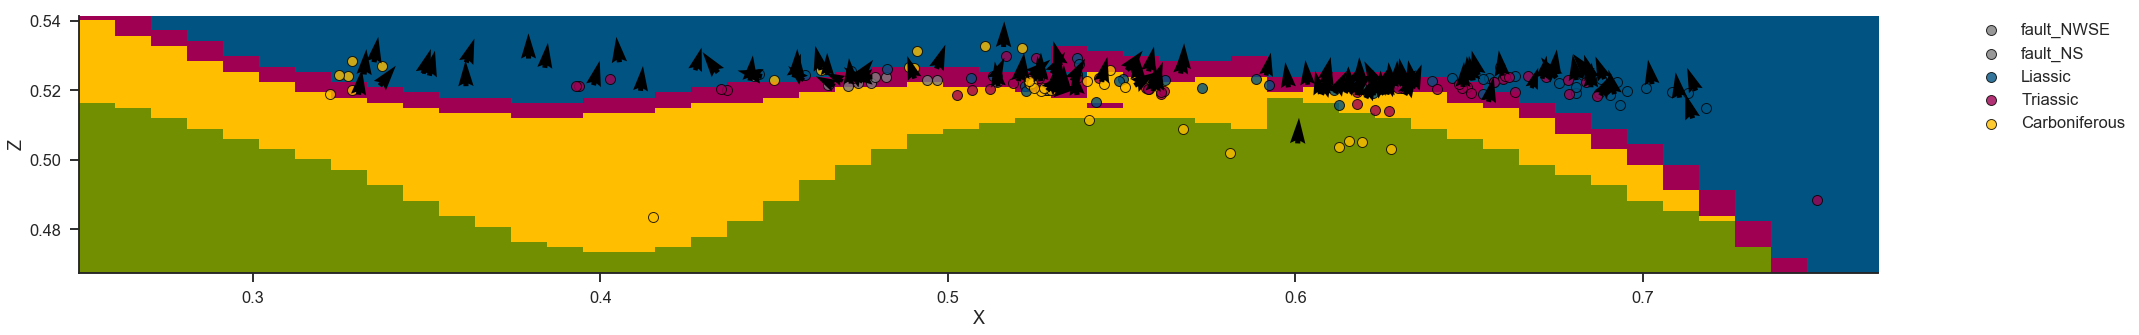

In [57]:
@pymc.deterministic(trace=False)
def gempy_model(value=0,
                input_data=input_data, verbose=True):
    
    # modify input data values accordingly
    interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]

    interp_data.geo_data_res.orientations[["X", "Y", "Z","G_x", "G_y", "G_z", 
                                           'dip', 'azimuth', 'polarity']] = input_data[1] 

    try:
        # try to compute model
        lb, fb = gp.compute_model(interp_data)
        #print(lb)
        if True:
            gp.plot_section(interp_data.geo_data_res, lb[0], 0, direction = 'y',plot_data=True)
            #print(interp_data.geo_data_res.interfaces["X"]) 
            
            return lb,fb

    
    except np.linalg.linalg.LinAlgError as err:
        # if it fails (e.g. some input data combinations could lead to 
        # a singular matrix and thus break the chain) return an empty model
        # with same dimensions (just zeros)
        if verbose:
            print("Exception occured.")
            return np.zeros_like(lith_block), np.zeros_like(fault_block)

In [58]:
params = [input_data, gempy_model,orient_modifier] 
model = pymc.Model(params)

In [59]:
dbname = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\databases\\final\\Model3_filt_1102_i"+str(n_iter)+".hdf5"

In [60]:
dbname

'C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\databases\\final\\Model3_filt_1102_i30.hdf5'

In [61]:
RUN = pymc.MCMC(model, db="hdf5",dbname = dbname)

In [62]:
RUN.sample(iter=n_iter, verbose=0)

 [--                6%                  ] 2 of 30 complete in 2.3 sec[---              10%                  ] 3 of 30 complete in 4.6 sec[-----            13%                  ] 4 of 30 complete in 6.8 sec[------           16%                  ] 5 of 30 complete in 9.0 sec[-------          20%                  ] 6 of 30 complete in 11.1 sec[--------         23%                  ] 7 of 30 complete in 13.3 sec[----------       26%                  ] 8 of 30 complete in 15.5 sec[-----------      30%                  ] 9 of 30 complete in 17.7 sec[------------     33%                  ] 10 of 30 complete in 20.1 sec[-------------    36%                  ] 11 of 30 complete in 22.3 sec[---------------  40%                  ] 12 of 30 complete in 24.5 sec[---------------- 43%                  ] 13 of 30 complete in 26.6 sec[-----------------46%                  ] 14 of 30 complete in 28.9 sec[-----------------50%                  ] 15 of 30 complete in 31.1 sec[-----------------53%          

### Posterior

In [63]:
import importlib
importlib.reload(gp.posterior_analysis_elisa )

<module 'gempy.posterior_analysis_elisa' from 'C:\\Users\\elisa\\Documents\\git\\gempy\\gempy\\posterior_analysis_elisa.py'>

In [64]:
from gempy.posterior_analysis_elisa import Posterior

In [65]:
post = Posterior(dbname,entropy=True,interpdata=interp_data,geodata=geo_data, topography=elevation)

Lithology probability for all post models are calculated. Based on the model complexity and the number of iterations, this could take a while


In [74]:
norm = matplotlib.colors.Normalize(post.map_ie.min(),post.map_ie.max())

In [73]:
post.map_ie.max(),post.map_ie.min()

(1.7539845481434939, 0.0)

In [93]:
iemap=np.flip(post.map_ie.reshape(320, 700),axis=0)
iemap2=post.map_ie.reshape(320, 700)

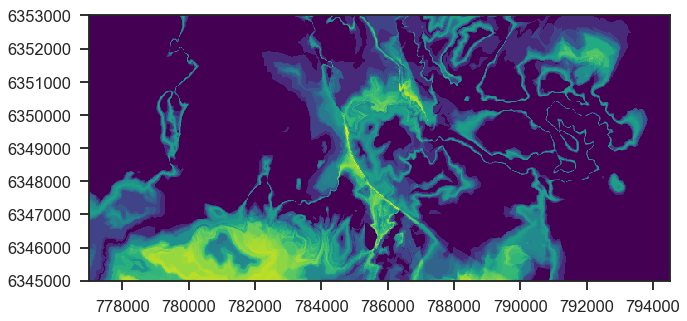

In [99]:
plt.imshow(iemap2,cmap='viridis',extent=geo_data.extent[:4])
plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\map_entropyflip2.png", format='png', dpi=1000)

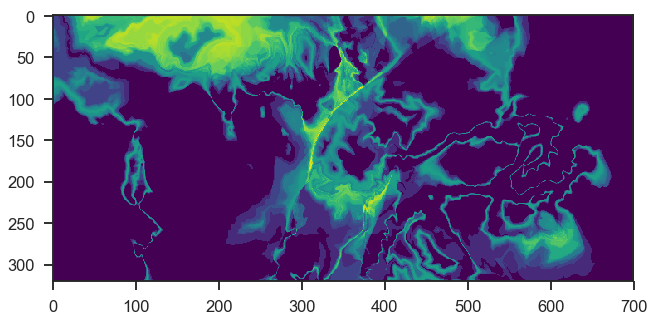

In [86]:
#gp.plotting.plot_data(geo_data,direction='z')
plt.imshow(iemap,cmap='viridis')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\map_entropy.png", format='png', dpi=1000)

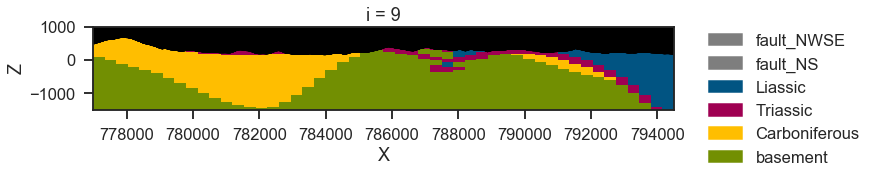

In [92]:
for i in range(0,10):
    post.plot_section(iteration=i,block='lith',fault=False)
    plt.title("i = %.d"%i)
    plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\post_y25_nofault"+str(i))

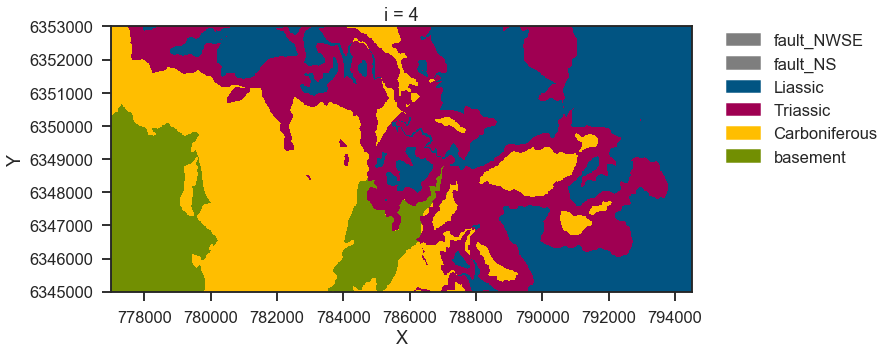

In [101]:
for i in range(0,5):
    post.plot_map(i)
    plt.title("i = %.d"%i)
    plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\post_map"+str(i))


In [66]:
post.plot_section_ie(block='lith',direction='y',cell_number=25,plot_data=True, plot_all_data=False)

AttributeError: 'Posterior' object has no attribute 'lb_ie'

KeyboardInterrupt: 

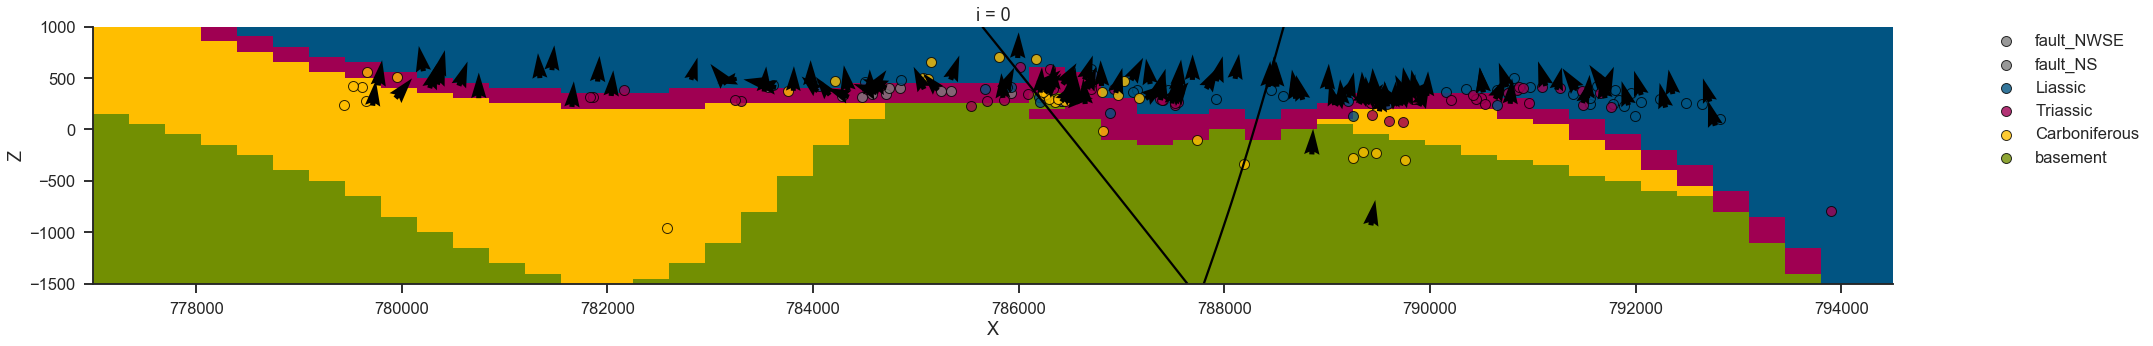

In [67]:
for i in range(0,2):
    post.plot_section(iteration=i,block='lith',fault=True,plot_data=True)
    plt.title("i = %.d"%i)
    #plt.savefig("C:\\Users\\elisa\\Documents\\git\\elthesis\\fig_export2\\entropy_orient"+str(i))

In [ ]:
post = Posterior(dbname,entropy=True,interpdata=interp_data,geodata=geo_data)

#### Topography

In [9]:
#topography
path_dtm='C:\\Users\\elisa\\Documents\\Ales\\DISTRIB_2018\\MNT\\MNT_Dx25m_ALES_L93.asc'
folder= "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\unwichtig"
xyz_path = "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\XYZ.csv"

In [10]:
from gempy.utils import topography

In [11]:
elevation = topography.DEM(path_dtm, geo_data,output_path = folder)

Extents of geo_data and DEM do not match. DEM is cropped and stored as C:\Users\elisa\Documents\git\MSc\GempyTopography\unwichtig_cropped_DEM.tif


Raster extent: [ 777000  794500 6345000 6353000     138     730] 
Raster resolution: [320 700]


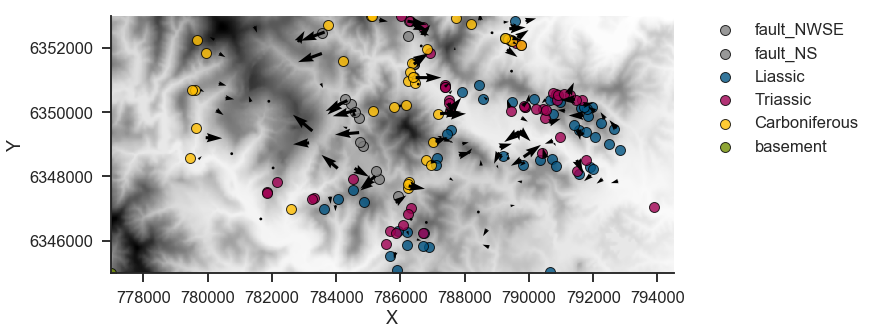

In [12]:
elevation.show(plot_data=True)

In [10]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2


In [11]:
lith_block, fault_block = gp.compute_model(interp_data)

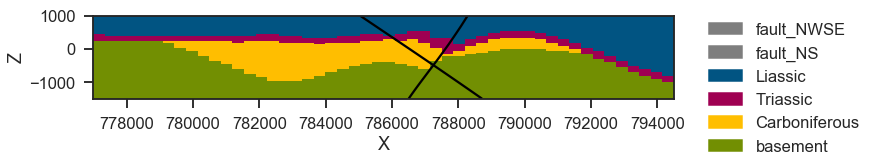

In [12]:
gp.plot_section(geo_data, lith_block[0], cell_number=5,  direction='y')#, topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

In [ ]:
lith_map, fault_map = gp.compute_model_at(elevation.surface_coordinates[0], interp_data)

In [ ]:
lith_map[0].reshape(324, 588)

In [ ]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map[0].reshape(324, 588),axis=0),plot_data=True)
gp.plotting.extract_countours(geo_data,interp_data, fb=fault_map, lb=lith_map)

In [99]:
geo_data.resolution

array([30, 30, 30])

In [21]:
ver , sim = gp.get_surfaces(interp_data,lith_block[1],(fault_block[1], fault_block[3], fault_block[5]))

In [22]:
gp.plotting.plot_surfaces_3D(geo_data, ver, sim, plot_data=False)

closing vtk
